**Data Science - course work**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene
from scipy.stats import mannwhitneyu
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score # r2 -> goodness of fit in linear regression
from sklearn.svm import SVR, SVC #support vector regression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA


# Task 1 
## 1.1 Data Leakage and biases
### 1.1.1.

In this paper (Giancardo et al., 2016), the researchers created an algorithm to distinguish Parkinson’s disease (PD) patients at the early stage of the disease from comparable healthy controls. They analyzed participants’ typing behavior using a standard keyboard by recording the hold time (HT), which is the duration between pressing and releasing each key. The HT data from each participant was split into non-overlapping 90-second windows, and from each window, 7 statistical features were extracted. These features were then used in a regression model to predict the clinical UPDRS-III motor score, which is a standardized measure of PD motor symptom severity. The output of this regression — called the neuroQWERTY index (nQi) — was then used as a feature to classify participants as either having Parkinson’s or being healthy. However, this pipeline introduces a serious data leakage issue. Because the model is trained to predict UPDRS-III, a score already strongly correlated with Parkinson’s diagnosis, the resulting nQi is inherently encoded with diagnostic information. Using it as input to a classifier effectively gives the model access to the labels it is supposed to predict. This can artificially enhance the model's performance metrics and increase the risk of overfitting, making the approach less reliable when applied to new, unseen populations where UPDRS scores are not available or might not generalize well.

### 1.1.2.

Furthermore, there are several biases that may affect the dataset. A major confounding issue is the different lifestyles of the participants. Typing is a habitual behavior; it can be learned and improved with practice, and its speed depends on how often the skill is used. Therefore, even factors like participants’ jobs (e.g., office work) can influence the results. A person with Parkinson’s disease might use a keyboard less frequently due to discomfort or motor difficulties compared to a healthy person, leading to reduced practice over time. As a result, their low performance in the typing task could reflect lifestyle changes or disuse, rather than a direct motor symptom of the disease.


## 1.2 - Exploratory Data analysis

In [28]:
#import data
df_features = pd.read_csv('/Users/ronny/Downloads/MIT_fingertapping_dataset/MIT_USERS_FEATURES.csv')
#change path to where the file is stored

df_features.head(10)  # first look at the data

,ID,Parkinsons,UPDRS,median_flight_time,std_flight_time,median_hold_time,std_hold_time,std_binned_flight_time,std_binned_hold_time,hand_symmetry,mean_flight_symmetry,mean_hold_symmetry,std_flight_symmetry,std_hold_symmetry,mean_flight_direction_symmetry,std_flight_direction_symmetry,mean_hold_direction_symmetry,std_hold_direction_symmetry
0,11,True,14.25,142.90,184.584488,93.9,44.440760,4.693407,1.739548,848.0,52.885633,61.061132,96.076974,29.838731,19.291014,69.417942,57.643646,27.413833
1,60,False,2.00,529.00,837.476992,122.9,37.994156,66.097678,4.373105,239.0,43.619230,36.612143,39.990040,3.831410,94.939998,60.961730,34.278162,4.200481
2,67,True,25.25,476.50,1154.993782,179.2,77.017094,81.909059,13.111766,248.0,175.433172,79.949188,116.865281,55.498010,153.803039,153.083905,80.864519,56.822530
3,68,False,6.00,361.60,823.429272,151.0,25.416287,39.183555,2.243013,301.0,8.972104,24.656048,133.634322,3.897480,47.494213,127.453713,24.601185,4.848499
4,70,True,26.25,617.70,1434.028934,179.7,42.075270,147.909365,7.374355,140.0,526.441293,26.459183,487.008181,7.729029,469.763131,442.845315,23.158001,4.802304
5,71,True,13.75,240.85,446.101598,150.7,41.320102,33.144839,2.981236,157.0,200.446286,19.672806,128.574912,2.775047,247.182804,240.357460,20.755592,0.079212
6,72,True,17.00,339.00,421.319926,157.5,69.600713,40.569706,9.020156,216.0,377.519083,92.029441,57.976288,45.225193,394.465070,128.643829,92.069659,43.371874
7,73,True,23.25,177.40,686.931101,80.8,40.743350,25.053689,1.862759,362.0,36.332749,34.821344,87.430606,24.336365,31.563012,311.104010,35.250517,22.643673
8,74,True,11.25,99.95,304.664564,119.1,46.188680,24.175599,5.037391,377.0,78.806065,4.291008,131.540485,25.330907,73.712051,176.016721,2.413284,25.551014
9,75,True,12.75,102.70,207.360561,165.8,36.579516,12.727321,10.162363,287.0,65.191827,0.956981,60.735012,3.649412,74.718568,96.282482,1.791559,3.637757


### 1.2.1 
This boxplot was performed in order to visualize the difference in UPDRS scores for the Healthy and Parkinson’s patients.

In [29]:
# separate the UPDRS scores into two groups: healthy vs. Parkinsons
healthy_UPDRS = df_features.loc[df_features['Parkinsons'] == False, 'UPDRS']  
parkinsons_UPDRS = df_features.loc[df_features['Parkinsons'] == True, 'UPDRS']

# calculate and print mean
print(f"Parkinson's mean UPDRS: {parkinsons_UPDRS.mean()}")
print(f"Healthy mean UPDRS: {healthy_UPDRS.mean()}")

# calculating the boxplot characteristic
def describe_boxplot(data, label):
    q1 = data.quantile(0.25)
    q2 = data.median()
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_whisker = data[data >= q1 - 1.5 * iqr].min()
    upper_whisker = data[data <= q3 + 1.5 * iqr].max()
    outliers = data[(data < q1 - 1.5 * iqr) | (data > q3 + 1.5 * iqr)]

    print(f"\n{label}:")
    print(f"  Q1 (25%): {q1:.2f}")
    print(f"  Median (Q2): {q2:.2f}")
    print(f"  Q3 (75%): {q3:.2f}")
    print(f"  IQR: {iqr:.2f}")
    print(f"  Lower whisker: {lower_whisker:.2f}")
    print(f"  Upper whisker: {upper_whisker:.2f}")
    print(f"  Outliers (number): {len(outliers)}")

# calculate statistics; output 
describe_boxplot(healthy_UPDRS, "Healthy")
describe_boxplot(parkinsons_UPDRS, "Parkinson's")
 

Parkinson's mean UPDRS: 20.613095238095237
Healthy mean UPDRS: 1.9244186046511629

Healthy:
  Q1 (25%): 0.50
  Median (Q2): 1.50
  Q3 (75%): 2.75
  IQR: 2.25
  Lower whisker: 0.00
  Upper whisker: 6.00
  Outliers (number): 0

Parkinson's:
  Q1 (25%): 14.69
  Median (Q2): 20.00
  Q3 (75%): 25.00
  IQR: 10.31
  Lower whisker: 7.00
  Upper whisker: 39.50
  Outliers (number): 0


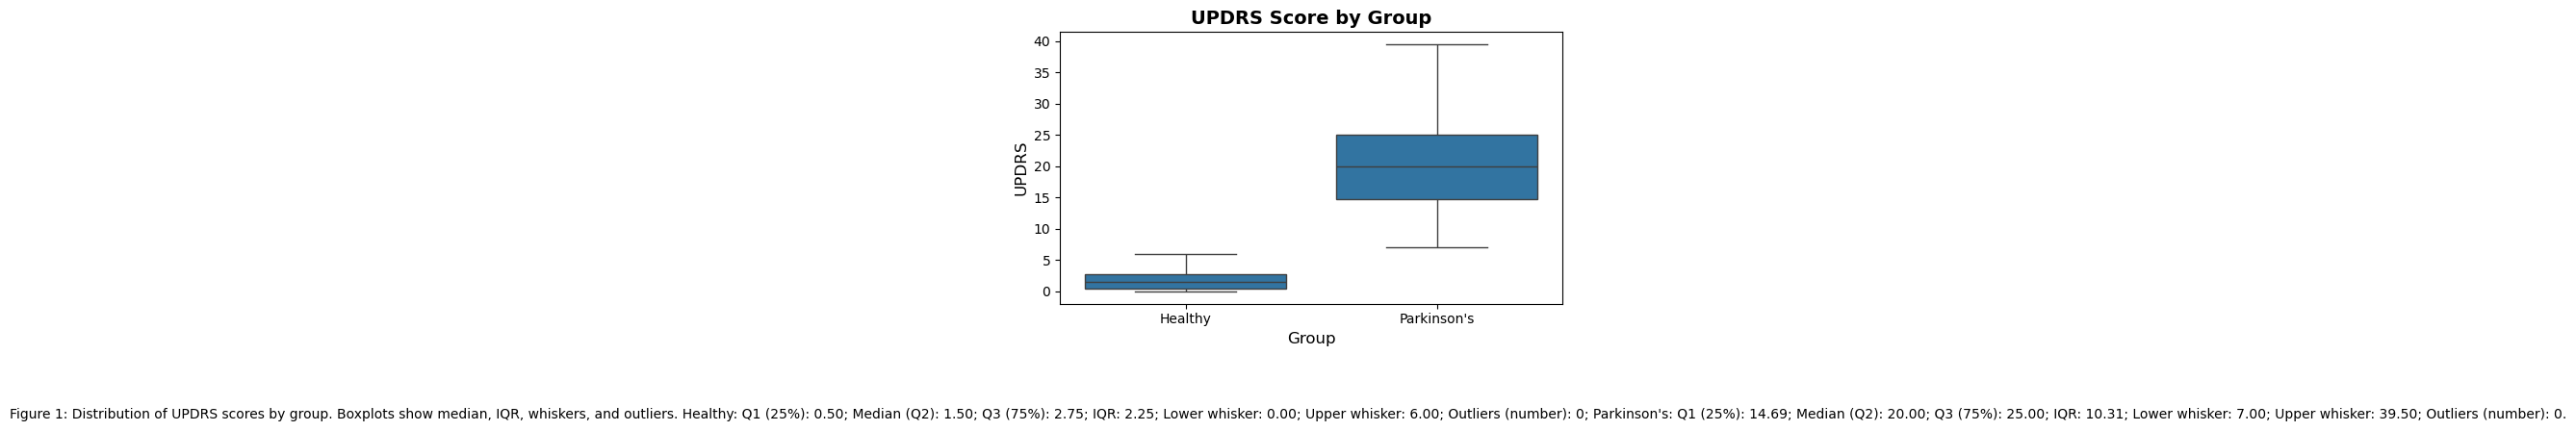

In [30]:
# create figure and axis 
fig, ax = plt.subplots(figsize=(6,4))

# visualization: Boxplot of UPDRS by group (important: ax=ax!)
sns.boxplot(data=df_features, x='Parkinsons', y='UPDRS', ax=ax)

ax.set_title('UPDRS Score by Group', fontsize=14, weight='bold')
ax.set_xlabel('Group', fontsize=12)
ax.set_ylabel('UPDRS', fontsize=12)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Healthy', "Parkinson's"])

# Caption 
fig.text(0.5, -0.1, 
         "Figure 1: Distribution of UPDRS scores by group. Boxplots show median, IQR, whiskers, and outliers. " \
         "Healthy: Q1 (25%): 0.50; Median (Q2): 1.50; Q3 (75%): 2.75; IQR: 2.25; Lower whisker: 0.00; Upper whisker: 6.00; Outliers (number): 0; " \
         "Parkinson's: Q1 (25%): 14.69; Median (Q2): 20.00; Q3 (75%): 25.00; IQR: 10.31; Lower whisker: 7.00; Upper whisker: 39.50; Outliers (number): 0.", 
         ha='center', fontsize=10)

plt.tight_layout(rect=[0, 0.05, 1, 1])  # sorgt dafür, dass Platz für die Caption bleibt
plt.show()


This boxplot demonstrates the median UPDRS score in the Parkinson’s cohort is substantially higher than in the healthy cohort (PD: Median= 20 vs. Healthy: Median= 1.5), indicating a clear difference in clinical severity. 
The interquartile range (IQR) is also larger in the Parkinson’s group (IQR=10.31), reflecting greater variability in scores. In contrast, the healthy cohort has a very narrow IQR (IQR: 2.25), with most values clustered close to zero. The whiskers suggest that the maximum scores in the Parkinson’s group are several times larger (Lower whisker: 7.00; Upper whisker: 39.50) than those in the healthy group(Lower whisker: 0.00; Upper whisker: 6.00). These reflect the heterogeneity of Parkinson’s progression and symptom profiles.
No extreme outliers are visible in either group. 

### 1.2.2 Difference UPDRS score Healthy vs Parkinsons - t-test + assumption checks

In order to test the siginificances of the UPDRS scores between the Healthy participants and Parkinson’s patients using a t-test, the following assumptions have to be made: 
- Normality, which is tested with the Shapiro-Wilk test
- Equal variances, which is tested with the Levene test
- Independence is assumed, because each participant only tested once


In [31]:
#Statistical Assumption Checks

# 1. Normality test: Shapiro-Wilk test for each group
stat_healthy_normality, p_healthy_normality = shapiro(healthy_UPDRS)
stat_parkinsons_normality, p_parkinsons_normality = shapiro(parkinsons_UPDRS)

print(f"Healthy group normality p-value: {p_healthy_normality:.3f}")
print(f"Parkinson's group normality p-value: {p_parkinsons_normality:.3f}")
# Interpretation: If p < 0.05: reject normality assumption (data is not normally distributed)

# 2. Homogeneity of variance test: Levene’s test
stat_levene, p_levene = levene(healthy_UPDRS, parkinsons_UPDRS)

print(f"Levene’s test p-value: {p_levene:.3f}")
# Interpretation: If p < 0.05: variances between groups are significantly different


Healthy group normality p-value: 0.000
Parkinson's group normality p-value: 0.164
Levene’s test p-value: 0.000


These results of the assumption checks indicate, there is no normality in healthy group (Shapiro–Wilk p < 0.05) as well as no equal variances (Levene’s test p < 0.05), which means the assumptions for applying a parametric t-test are not met. For this reason a Wilcoxon rank-sum test (also called Mann-Whitney U test), which is a non-parametric alternative, was perfomed instead. 

In [32]:
# Group Comparison: non-parametric Mann-Whitney U test (normality/variance assumptions rejected)
stat_wilcoxon, p_wilcoxon = mannwhitneyu(healthy_UPDRS, parkinsons_UPDRS)

print(f"Mann-Whitney U test: statistic = {stat_wilcoxon}, p-value = {p_wilcoxon}")
# Interpretation: p < 0.05: significant difference in UPDRS distributions

Mann-Whitney U test: statistic = 0.0, p-value = 1.8957918900826273e-15


The result of the Wilcoxon rank-sum test (p < 0.05) indicates a significant differnece in UPDRS distributions between the Healthy and Parkinsons cohort. 
However, since the statistic parameter of the test is 0, a test for Minimum and Maximum was conducted. 

In [33]:
# Because Mann-Whitney U test statistic = 0 -> strange, find reason 
# -> look if there is overlap by calculating ranges of both gropus

print("Healthy UPDRS range:")
print(f"Min: {healthy_UPDRS.min():.2f}, Max: {healthy_UPDRS.max():.2f}")

print("\nParkinson's UPDRS range:")
print(f"Min: {parkinsons_UPDRS.min():.2f}, Max: {parkinsons_UPDRS.max():.2f}")

# result: no overlap


Healthy UPDRS range:
Min: 0.00, Max: 6.00

Parkinson's UPDRS range:
Min: 7.00, Max: 39.50


The results indicate, there is no overlap between the two groups' UPDRS scores. 

### 1.2.3 Correlations of all feature variables

In order to visualise the correlations of all feature variables a seaborn pairplot and an additional correlation heatmap were conducted. 

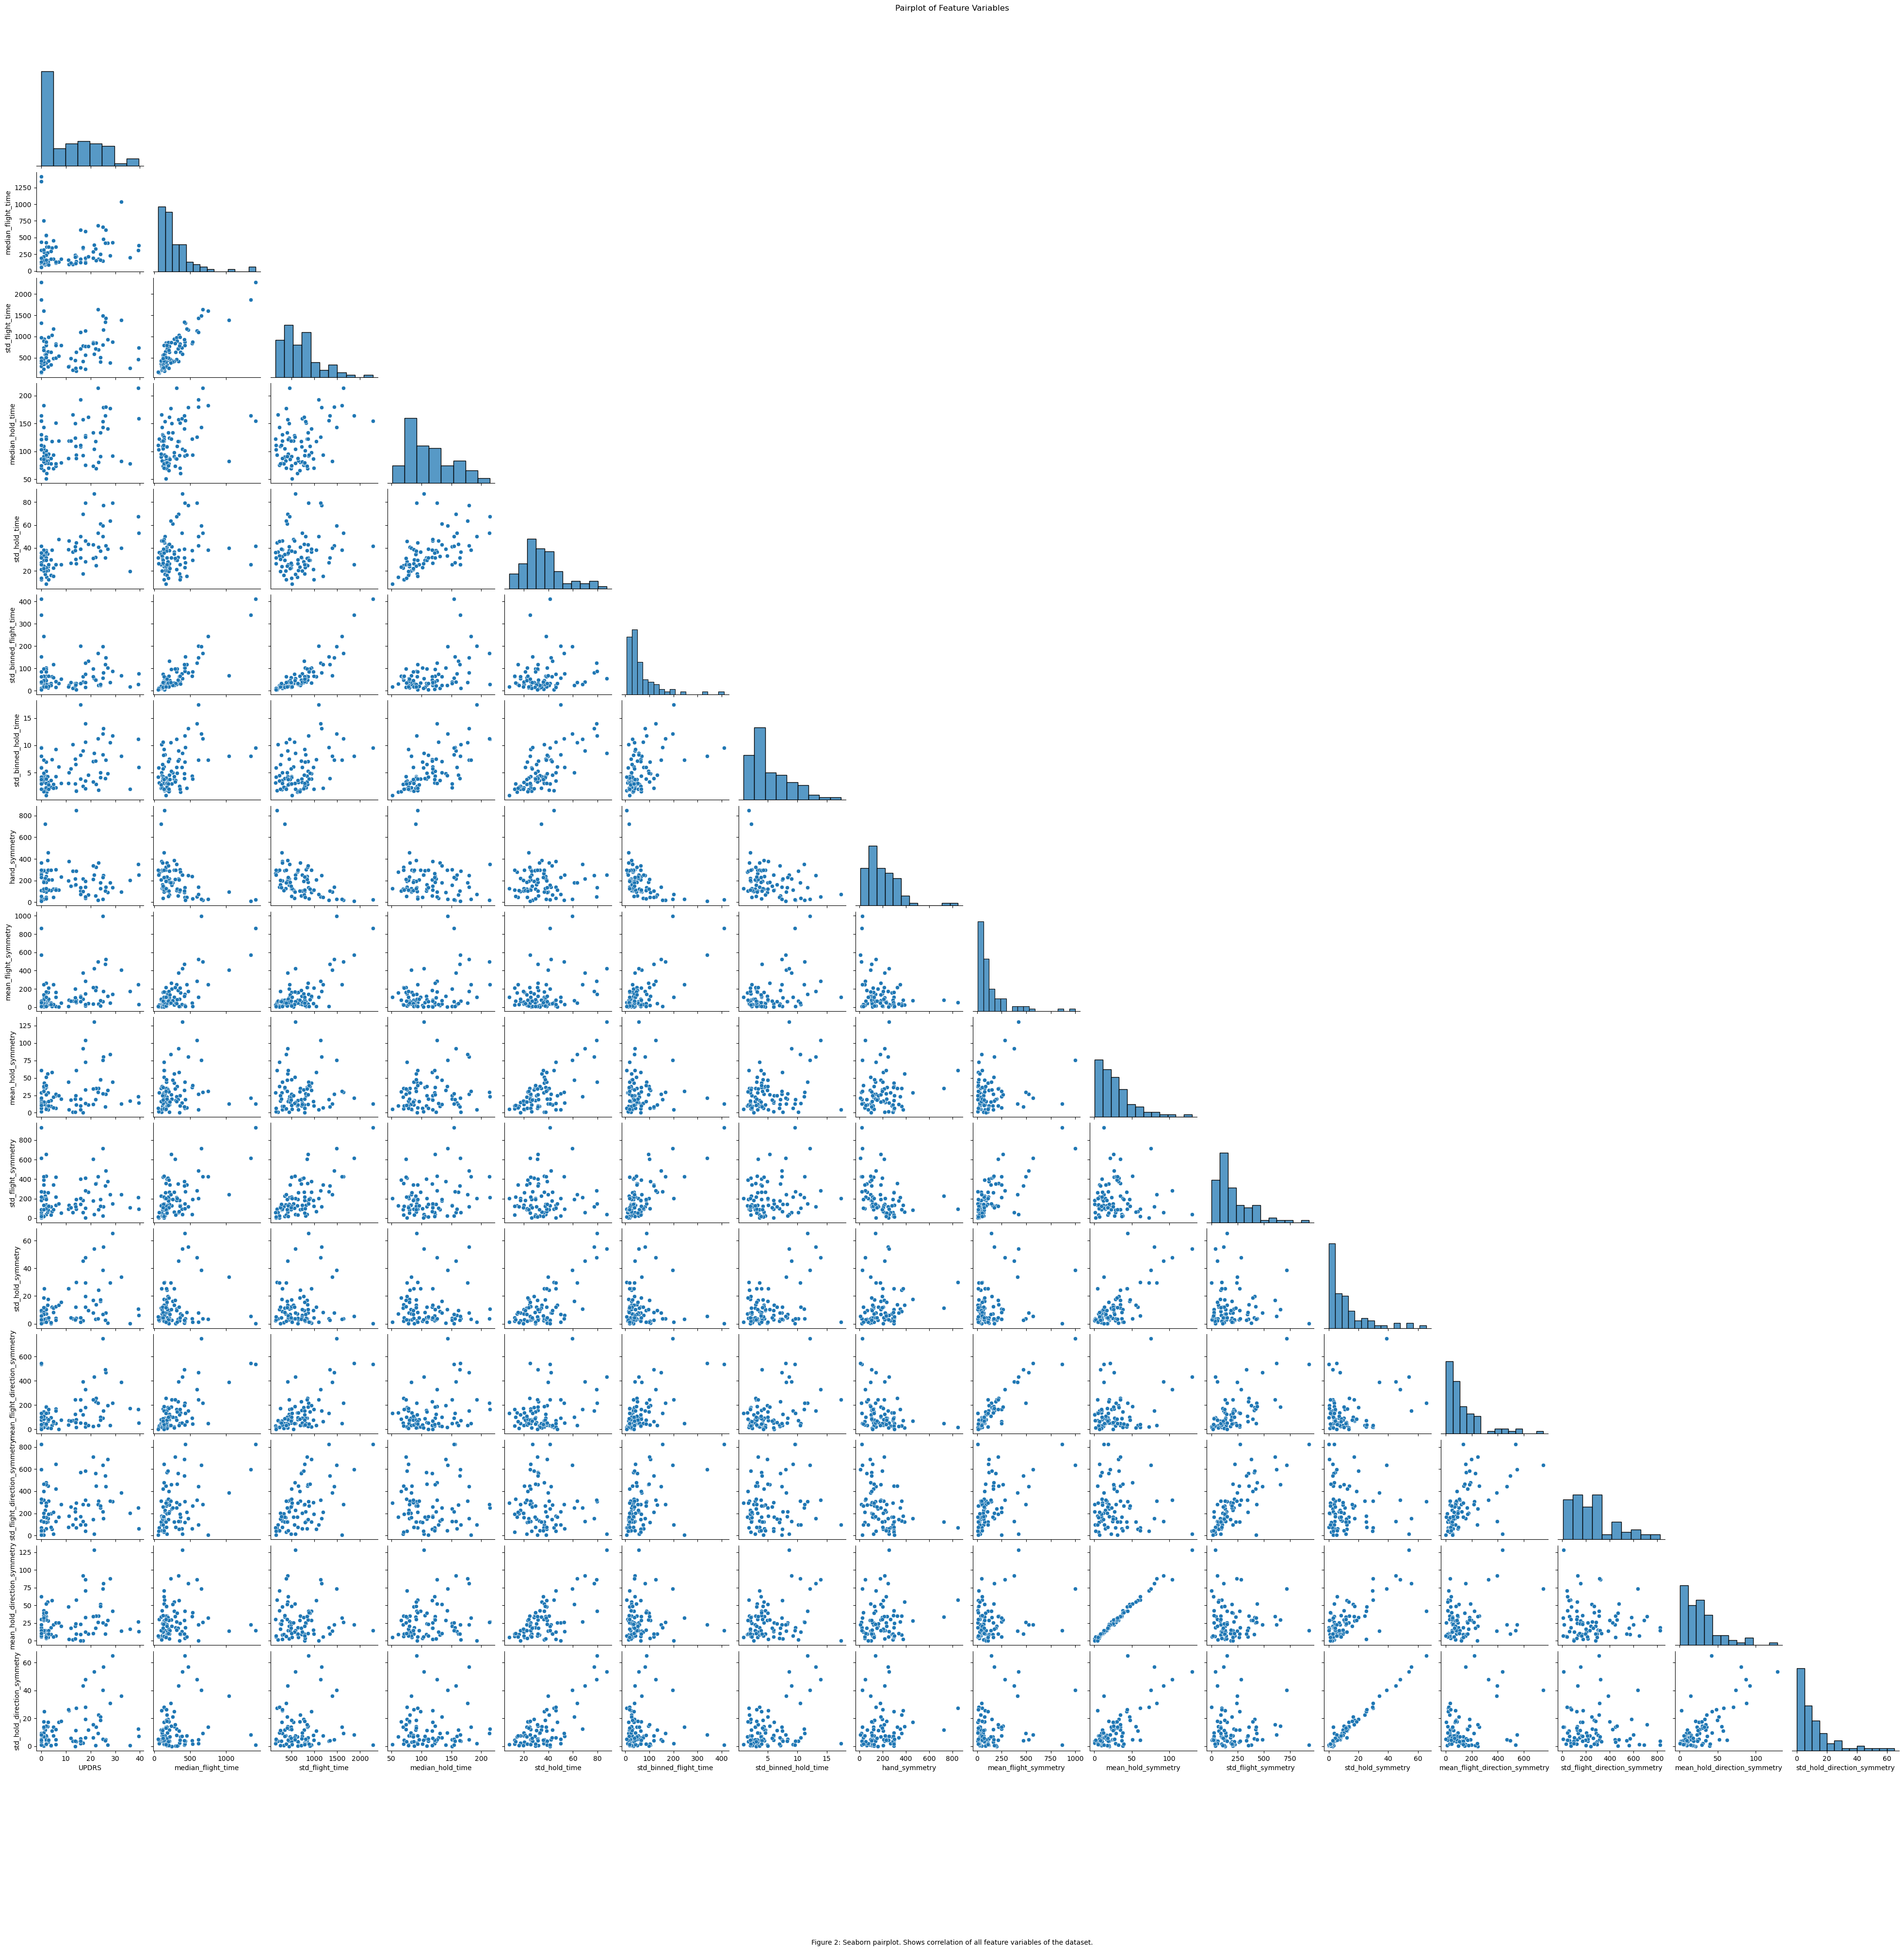

In [34]:
features_only_df = df_features.drop(columns=['ID', 'Parkinsons'])   # drop non-feature columns

# Pairplot: visualizes pairwise relationships between features
pairplot = sns.pairplot(features_only_df, corner=True)
# set titel
pairplot.fig.suptitle("Pairplot of Feature Variables", y=1.02)

# room underneath plot
pairplot.fig.subplots_adjust(bottom=0.12)

# Figure caption 
pairplot.fig.text(
    0.5, 0.02,
    "Figure 2: Seaborn pairplot. Shows correlation of all feature variables of the dataset.",
    ha="center", fontsize=10
)

plt.show()

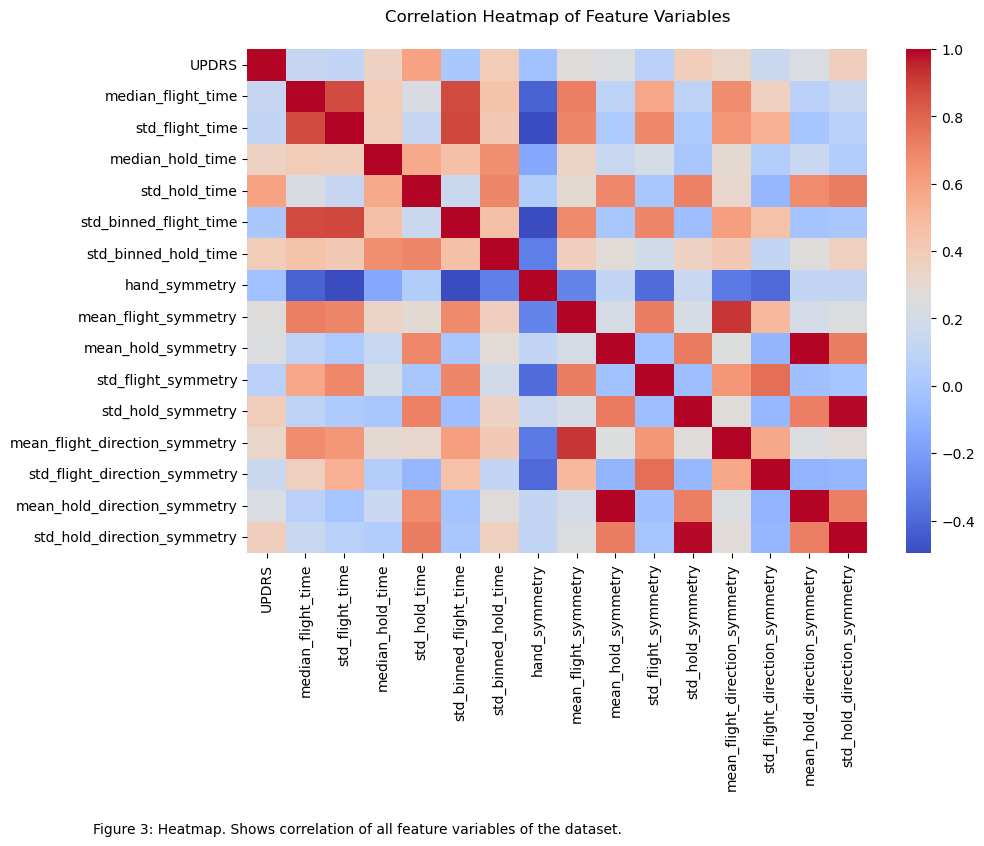

In [35]:
# to get a better overview: Correlation heatmap

# Computes the Pearson correlation coefficient between all pairs
corr = features_only_df.corr()

# heatmap; Color-coded correlation strength
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', ax=ax) 

# titel
ax.set_title("Correlation Heatmap of Feature Variables", pad=20)

# makes space underneath
fig.subplots_adjust(bottom=0.25)

# Caption 
fig.text(
    0.5, -0.1,
    "Figure 3: Heatmap. Shows correlation of all feature variables of the dataset.",
    ha="right", fontsize=10
)

plt.show()

The pairplot visualises the marginal distributions (via histograms) and pairwise joint distributions (via scatterplots) of the extracted motor features. Most scatterplots indicate weak or no linear associations, though subsets such as the flight-time measures, particularly 
(median_flight_time,std_flight_time), show positive linear trends, suggesting redundancy. Redundancy means a variable contains almost no new information, because its highly correlating with another variable. 
Flight time, defined as the interval between releasing one key and pressing the next, reflects motor initiation speed; a high correlation among its measures indicates that individuals with longer average flight times also tend to show greater variability, consistent with impaired motor control in Parkinson’s disease.

The heatmap reinforces these observations by highlighting strong correlations (ρ>0.7) among flight-time features, as well as within the hold-time feature group. Symmetry measures, by contrast, show consistently high correlations with one another but weaker associations with timing features (0.4<ρ<0.8), implying they capture distinct aspects of motor control. Notably, hand-symmetry features display negative correlations (ρ<0) with several other variables, suggesting that greater asymmetry in hand use is associated with different patterns of timing performance, which may further differentiate Parkinson’s patients from healthy controls.

# Task 2 
## 2.1 Linear Regression of Feautures against UPDRS score

### 2.1.1 Perform a linear regression of the feature variables against UPDRS score

In order to quantify the relationship between the keystroke-based features and UPDRS severity, a linear regression was performed. This identifyed which features are most predicitve and established a baseline model for comparison. Splitting the dataset into Training and Testing validated that the model generalizes.

In [36]:
# linear regression for predicting UPDRS

# first clean data - check for missing values in feature matrix

features_only_df.isna().any(axis=0) # features_only_df = feature matrix

# result: no missing data

UPDRS                             False
median_flight_time                False
std_flight_time                   False
median_hold_time                  False
std_hold_time                     False
std_binned_flight_time            False
std_binned_hold_time              False
hand_symmetry                     False
mean_flight_symmetry              False
mean_hold_symmetry                False
std_flight_symmetry               False
std_hold_symmetry                 False
mean_flight_direction_symmetry    False
std_flight_direction_symmetry     False
mean_hold_direction_symmetry      False
std_hold_direction_symmetry       False
dtype: bool

First, it was confirmed the dataset bares no missing data. 

In [37]:
# dependent variable y =  UPDRS (predicted)
y = features_only_df['UPDRS']

# predictors = all other feature variables 
x = features_only_df.drop(columns=['UPDRS'])

# split data into train and test (70% training and 30% testing)
# random_state=6 to make it reproducable (everytime same distribution)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 6 )

# scaling - Standardize predictors: mean=0, std=1
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# train linear regression model on the train data
model = LinearRegression()
model.fit(x_train_scaled, y_train)

# Predictions on the test set
y_test_prediction = model.predict(x_test_scaled)


### 2.1.2- Which features display the strongest relationship? What are their coefficients? 

In [38]:
# Model evaluation
# calculate R² (Goodness of Fit): measures proportion of variance in UPDRS explained by the predictors
r2 = r2_score(y_test, y_test_prediction)
print(r2)

-0.45047555336108647


The output of this model evaluation, based on the calculation of the R², shows the model performes worse than prediciting the mean. This is indicated by the negative R² yielding a value of -0.4504755533610898. Likely showing the correlation is non-linear. 
Concluding that a linear regression is not suitable for this dataset, as the relationships are non-linear.

In [39]:
# Model parameters

# intercept (baseline UPDRS when all predictors = 0) 
print(model.intercept_)


12.004237288135595


The intercept, represents the predicted value of the dependent variable when all independent variables are zero. In this model the intercept yields a value of 12.004237288135595. 

In [40]:
# Coefficients for each predictor variable   
coefficients = pd.Series(model.coef_, index=x.columns)

#print(coefficients.sort_values(ascending=False))

# Display coefficients in a table
coeff_table = pd.DataFrame({
    "Feature": coefficients.index,
    "Coefficient (β)": coefficients.values,
})

display(coeff_table)


,Feature,Coefficient (β)
0,median_flight_time,1.077303
1,std_flight_time,2.787048
2,median_hold_time,0.056494
3,std_hold_time,11.643509
4,std_binned_flight_time,-9.628720
5,std_binned_hold_time,-1.420622
6,hand_symmetry,-0.366528
7,mean_flight_symmetry,-0.498552
8,mean_hold_symmetry,21.627173
9,std_flight_symmetry,1.910057


The coefficient value represents the mean change in the response given a one-unit increase in the predictor. 

In [41]:
# strongest features (absolute value)
strongest_features = coefficients.abs().sort_values(ascending=False)

top5_features = strongest_features.head(5) # only top 5 features

# Display coefficients in a table
coeff_table_top5 = pd.DataFrame({
    "Feature": top5_features.index,
    "Coefficient (β)": top5_features.values,
})

display(coeff_table_top5)

,Feature,Coefficient (β)
0,mean_hold_direction_symmetry,27.243377
1,mean_hold_symmetry,21.627173
2,std_hold_direction_symmetry,12.643251
3,std_hold_symmetry,12.615029
4,std_hold_time,11.643509


## 2.2 Non-linear regression of features against UPDRS score 

Since the dataset is non-linear, and a linear regression should not be applied. In the following a non-linear regression was performed. 

### 2.2.1- Non-linear regression using a support vector machine

In [42]:
# (what is different to code used inclass: we use support vector regressor instead of classifier)
# note: we can reuse the train test split and the scaling from before (linear regression) -> (x_train_scaled, x_test_scaled, y_train, y_test)

# Create SVR model - Using the RBF (Radial Basis Function) kernel -> non-linear
svm = SVR(kernel='rbf')

# Train SVR on scaled training data
svm.fit(x_train_scaled, y_train)

# Predict UPDRS scores on scaled test data
y_test_pred_svm = svm.predict(x_test_scaled)

### 2.2.2-  Compare and contrast with the linear regression

In [43]:
# Evaluate model performance
# Evaluate: R² (Goodness of Fit): measures proportion of variance in UPDRS explained by the predictors
r2_svm = r2_score(y_test, y_test_pred_svm)
print(r2_svm)


0.21998890097090673


The R² Score of the non-linear regression, yielding a value of 0.21998890097090673, is significantly better than the respective R² Score of the linear regression. 
Indicating the  non-linear model (SVR) captures the complex relationships in the data much more effectively. 





**Task 3**

Classification of healthy vs Parkinson's disease


Test Accuracy: 0.94
Mean CV Accuracy: 0.78


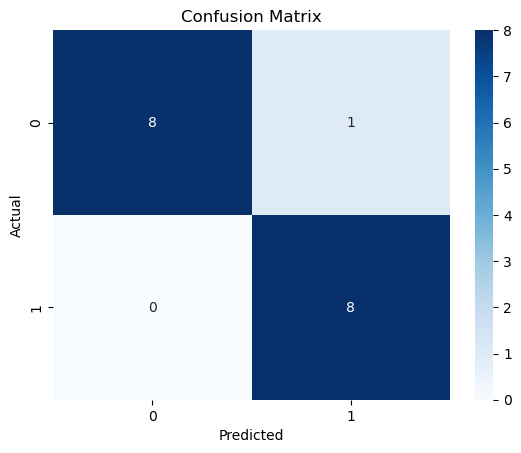

In [46]:
# Define the previously loaded data as "data"
data = df_features

# Remove the UPDRS data from the dataset to prevent data leakage
data = data.drop(columns=['UPDRS'])
data = data.reset_index(drop=True)


# Divide the dataset into dependent and independent variables
y = data["Parkinsons"]
X = data.drop(columns=["Parkinsons"])

#print(data.head())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Create the Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict the outcome
y_pred = model.predict(X_test)

# Calculate the accuracy of the test
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Check for the Cross-Validation Accuracy
cv_scores = cross_val_score(model, X_scaled, y, cv=5)
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")

# Visualize the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Test Accuracy (SVC): 0.82
Mean CV Accuracy (SVC): 0.74


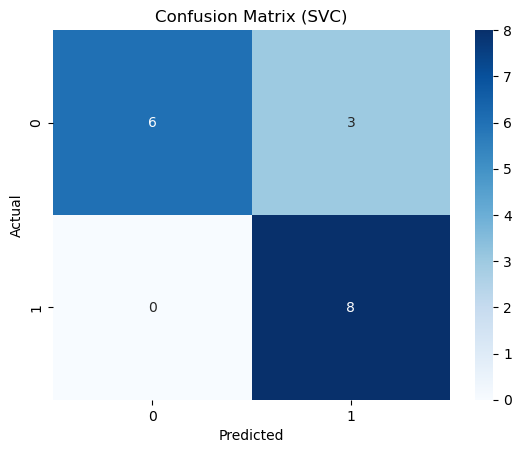

In [52]:
# Define the previously loaded data as "data"
data = df_features

# Remove the UPDRS data from the dataset to prevent data leakage
data = data.drop(columns=['UPDRS'])
data = data.reset_index(drop=True)


# Divide the dataset into dependent and independent variables
y = data["Parkinsons"]
X = data.drop(columns=["Parkinsons"])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


# Create the Support Vector Classifier (SVC) Model
svc = SVC(kernel="rbf", probability=True, random_state=42)
svc.fit(X_train, y_train)

# Predict the outcome
y_pred = svc.predict(X_test)

# Calculate the accuracy of the test
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy (SVC): {accuracy:.2f}")

# Check for the Cross-Validation Accuracy
cv_scores = cross_val_score(svc, X_scaled, y, cv=5)
print(f"Mean CV Accuracy (SVC): {cv_scores.mean():.2f}")

# Visualize the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVC)")
plt.show()


In [54]:
# Reduce PCA to 10 dimensions
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Split the data into test and train
X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression of the PCA data
log_reg_pca = LogisticRegression(max_iter=1000)
log_reg_pca.fit(X_train_pca, y_train)
y_pred_pca = log_reg_pca.predict(X_test_pca)
print("Logistic Regression PCA Accuracy:", accuracy_score(y_test, y_pred_pca))

# Support Vector Classifier to PCA data
svc_pca = SVC(kernel="rbf", probability=True, random_state=42)
svc_pca.fit(X_train_pca, y_train)
y_pred_svc_pca = svc_pca.predict(X_test_pca)
print("SVC PCA Accuracy:", accuracy_score(y_test, y_pred_svc_pca))


Logistic Regression PCA Accuracy: 0.8823529411764706
SVC PCA Accuracy: 0.8235294117647058


When dimensionality reduction was applied using PCA prior to classification, both models achieved relatively high accuracy, although with slightly decreased performance compared to using the full feature set. Logistic regression performed better than SVC after dimensionality reduction, achieving an accuracy of 0.88 compared to 0.82 for SVC.

This suggests that, although PCA simplifies the feature space and reduces dimensionality, it may also result in a slight loss of discriminative information that is relevant for classification. Logistic regression seems to generalise better in the reduced feature space, whereas SVC benefits more from the full, high-dimensional representation.

Overall, dimensionality reduction improves computational efficiency and aids visualisation, but comes at the cost of predictive performance.